# Object Handling, Class method, Static methods, Instance Methods

                                              "Everything is an object"

# Object Handling

Python is an object oriented programming language.

What is an object?

Class is a bundle of data of different types and functions logically grouped together.
An object is an instance of a particular class.
We can think of class as a blueprint, a template based on which an object is created.

Guido van Rossum, who wrote Python, was very deliberate in ensuring all objects in Python were “first class.” 

In other words, list, string, integer, or function — “anything that could be named in the language” — is an object that belongs to the corresponding class, and should be treated indiscriminately.<br>
The names of these classes describe the data type of an object.

In [1]:
L = [1, 2, 3]
print(type(L))


def my_func():
    x = 89

print(type(my_func))


str = "string"
print(type(str))

<class 'list'>
<class 'function'>
<class 'str'>


Create Objects:
Now we can use the class named MyClass to create objects:

In [2]:
class MyClass:
  x = 5
p1 = MyClass()
print(p1.x)

5


## Mutable vs. Immutable Objects
There are two kinds of objects in Python: Mutable objects and Immutable objects.

### Mutable Objects
The value of a mutable object can be modified in place after it’s creation<br>
list, dict, set, byte array, user-defined classes

_id()_<br> this function returns the unique identity of an object. 
No two objects have the same identity.

In [3]:
print("Mutable Objects : Ids are the same")
list_1 = [1,2,3]
print(id(list_1))

list_1 += [4]
print(id(list_1))

Mutable Objects : Ids are the same
2792213017288
2792213017288


### Immutable Objects
The value of an immutable object cannot be changed<br>
int, float, long, complex, string tuple, bool

In [4]:
print("Immutable Objects : Ids are different")
num = 10
print(id(num))

num += 1
print(id(num))

Immutable Objects : Ids are different
1821929216
1821929248


## Memory Management

Variables in Python refer to values (or objects) stored somewhere in memory.<br>
In fact, all variable names in Python are said to be references to the values, some of which are front loaded by Python and therefore exist before the name references occur.<br>
Python keeps an internal counter on how many references an object has.<br>
Once the counter goes to zero — meaning that no reference is made to the object — the garbage collector in Python removes the object , thus freeing up the memory.

**Making References to Values<br>**
Each time we create a variable that refers to an object, a new object is created.

![title](object_img1.jpg)


In [5]:
L1 = [1, 2, 3]
L2 = [1, 2, 3]
L1 == L2 # L1 and L2 have the same value

True

The 'is' operator evaluates whether or not the objects have the same identity.
In other words, if they are the same object.

In [6]:
L1 is L2 # L1 and L2 do not refer to the same object

False

In [7]:
x = 10
y = x      # y refers to the same object (number 10) as x
x = 20     # x now refers to a different object (number 20),  since integers are immutable
           
print(y)   #  but y is still referring to the same object   

10


### Exceptions with Immutable Objects<br>
While it is true that a new object is created each time we have a variable that makes reference to it, there are few notable exceptions:<br>

1. some strings
1. Integers between -5 and 256 (inclusive)
1. empty immutable containers (e.g. tuples)

These exceptions arise as a result of memory optimization in Python implementation. After all, if two variables refer to objects with the same value, why wasting memory creating a new object for the second variable? Why not simply have the second variable refer to the same object in memory ?

#### 1) String Interning
String interning allows two variables to refer to the same string object.

In [8]:
a = "My name is sachin"
b = "My name is sachin"
a is b

False

This should not be surprising, since it obeys the “new objects are created each time” rule.

In [9]:
a = "python"
b = "python"
a is b

True

Python automatically does this and there are certain rules that are followed.
One can also forcibly intern strings by calling the intern() function. 

In [10]:
import sys
a = "My name is sachin"
b = "My name is sachin"
print(a is b)

a = sys.intern('My name is sachin')
b = sys.intern('My name is sachin')
print(a is b)

False
True


#### 2) Integer Caching
The Python implementation front loads an array of integers between -5 to 256.
Hence, variables referring to an integer within the range would be pointing to the same object that already exists in memory:

In [11]:
a = 256
b = 256
a is b

True

In [12]:
a = 257
b = 257
a is b

False

#### 3) Empty Immutable Objects
For empty tuples, the tuple would point to the same object

In [13]:
a = ()
b = ()
print(a is b)

True


For non-empty tuples, new objects are created, even though both objects have the same value

In [14]:
a = (1,)
b = (1,)
print(a is b)

False


### Aliasing
We can, however, have two variables refer to the same object through a process called “aliasing”:
assigning one variable the value of the other variable.<br>
In other words, one variable now serves as an alias for the other, since both of them now refer to the same object.

In [15]:
L1 = [1, 2, 3]
L2 = L1      

print('L1 == L2', L1 == L2)

print('L1 is L2', L1 is L2)

L1 == L2 True
L1 is L2 True


L2 now refers to the same object as L1

In [16]:
L1.append(4)    # Append to L1

print(L2)       # Print L2   

[1, 2, 3, 4]


Since L1 and L2 both refer to the same object, modifying L1 results in the same change in L2.

### Deep Copy and Shallow Copy

In [2]:
def pepople_do_mistake(list_):
    list_[1][1] = 'AA'
    return list_

old_list = [[1, 1, 1], [2, 2, 2], [3, 3, 3]]
new_list = pepople_do_mistake(old_list)
print('old_list', old_list)
print('new_list', new_list)

old_list [[1, 1, 1], [2, 'AA', 2], [3, 3, 3]]
new_list [[1, 1, 1], [2, 'AA', 2], [3, 3, 3]]


In Python, Assignment statements creates a new variable that shares the reference of the original object.<br>
Sometimes a user wants to work with mutable objects, in order to do that user looks for a way to create “real copies” or “clones” of these objects. <br>
Or, sometimes a user wants copies that user can modify without automatically modifying the original at the same time, in order to do that we create copies of objects.<br>
A copy is sometimes needed so one can change one copy without changing the other. <br>


#### Shallow Copy
A shallow copy creates a new object which stores the reference of the original elements.<br>
So, a shallow copy doesn't create a copy of nested objects, instead it just copies the reference of nested objects.<br>
This means, a copy process does not recurse or create copies of nested objects itself.

In [17]:
import copy

old_list = [[1, 1, 1], [2, 2, 2], [3, 3, 3]]
new_list = copy.copy(old_list)

old_list.append([4, 4, 4])

print("Id Old list:", id(old_list))
print("Id New list:", id(new_list))
print("Old list:", old_list)
print("New list:", new_list)
print("Id Old list[0]:", id(old_list[0]))
print("Id New list[0]:", id(new_list[0]))

Id Old list: 2792230451592
Id New list: 2792230452680
Old list: [[1, 1, 1], [2, 2, 2], [3, 3, 3], [4, 4, 4]]
New list: [[1, 1, 1], [2, 2, 2], [3, 3, 3]]
Id Old list[0]: 2792230287176
Id New list[0]: 2792230287176


In [18]:
old_list = [[1, 1, 1], [2, 2, 2], [3, 3, 3]]
new_list = copy.copy(old_list)

old_list[1][1] = 'AA'

print("Old list:", old_list)
print("New list:", new_list)

Old list: [[1, 1, 1], [2, 'AA', 2], [3, 3, 3]]
New list: [[1, 1, 1], [2, 'AA', 2], [3, 3, 3]]


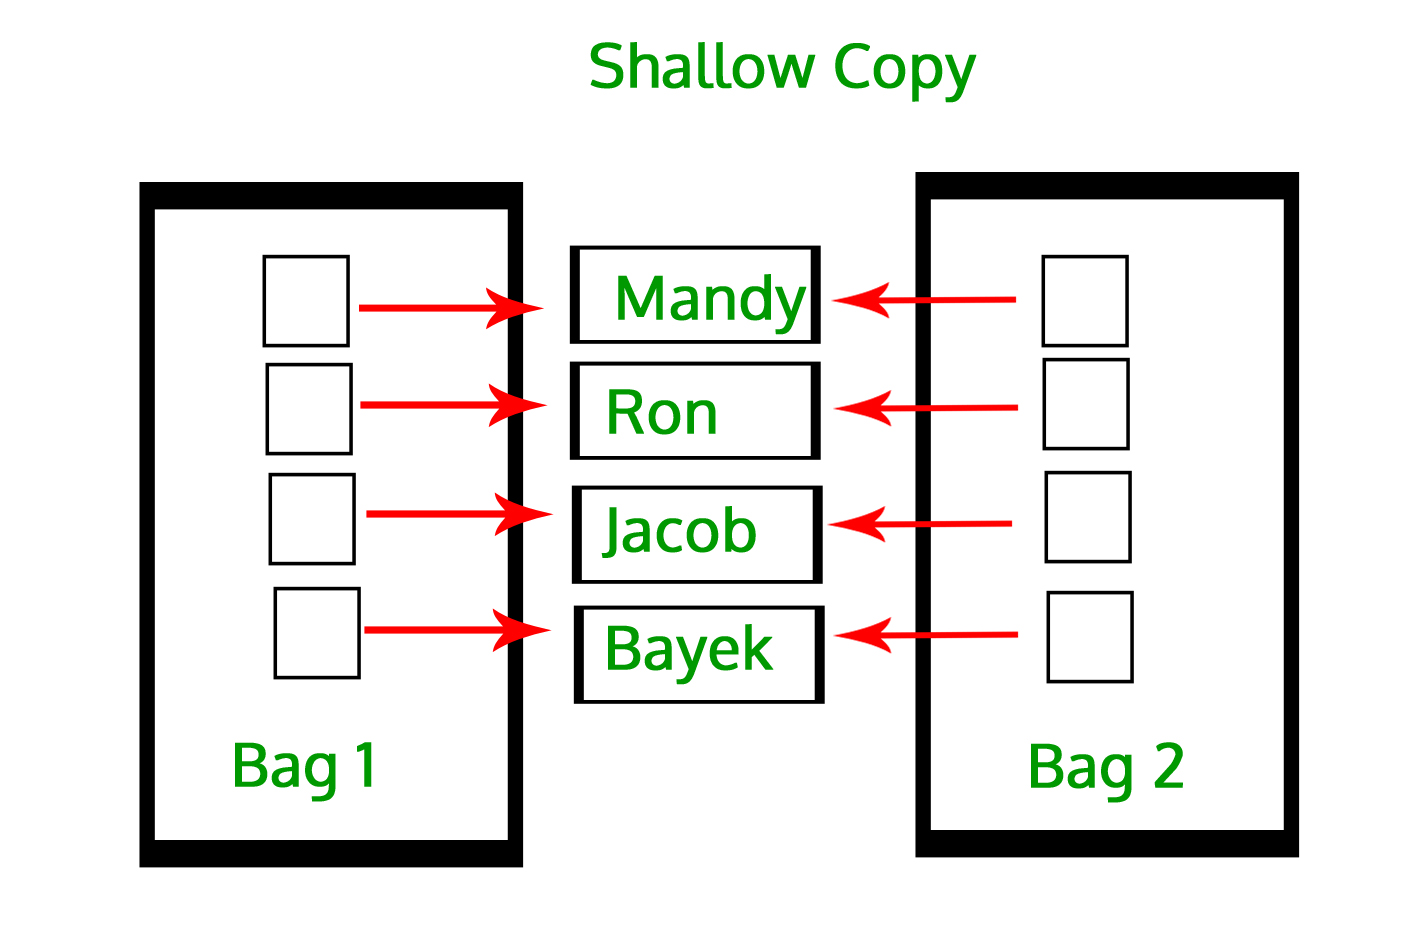

#### Deep Copy
A deep copy creates a new object and recursively adds the copies of nested objects present in the original elements.<br>
A copy of object is copied in other object. It means that any changes made to a copy of object do not reflect in the original object.

In [19]:
import copy

old_list = [[1, 1, 1], [2, 2, 2], [3, 3, 3]]
new_list = copy.deepcopy(old_list)

print("Id Old list:", id(old_list))
print("Id New list:", id(new_list))
print("Old list:", old_list)
print("New list:", new_list)
print("Id Old list[0]:", id(old_list[0]))
print("Id New list[0]:", id(new_list[0]))

Id Old list: 2792230479048
Id New list: 2792230286856
Old list: [[1, 1, 1], [2, 2, 2], [3, 3, 3]]
New list: [[1, 1, 1], [2, 2, 2], [3, 3, 3]]
Id Old list[0]: 2792230240136
Id New list[0]: 2792230477896


In [20]:
old_list = [[1, 1, 1], [2, 2, 2], [3, 3, 3]]
new_list = copy.deepcopy(old_list)

old_list[1][1] = 'AA'

print("Old list:", old_list)
print("New list:", new_list)

Old list: [[1, 1, 1], [2, 'AA', 2], [3, 3, 3]]
New list: [[1, 1, 1], [2, 2, 2], [3, 3, 3]]


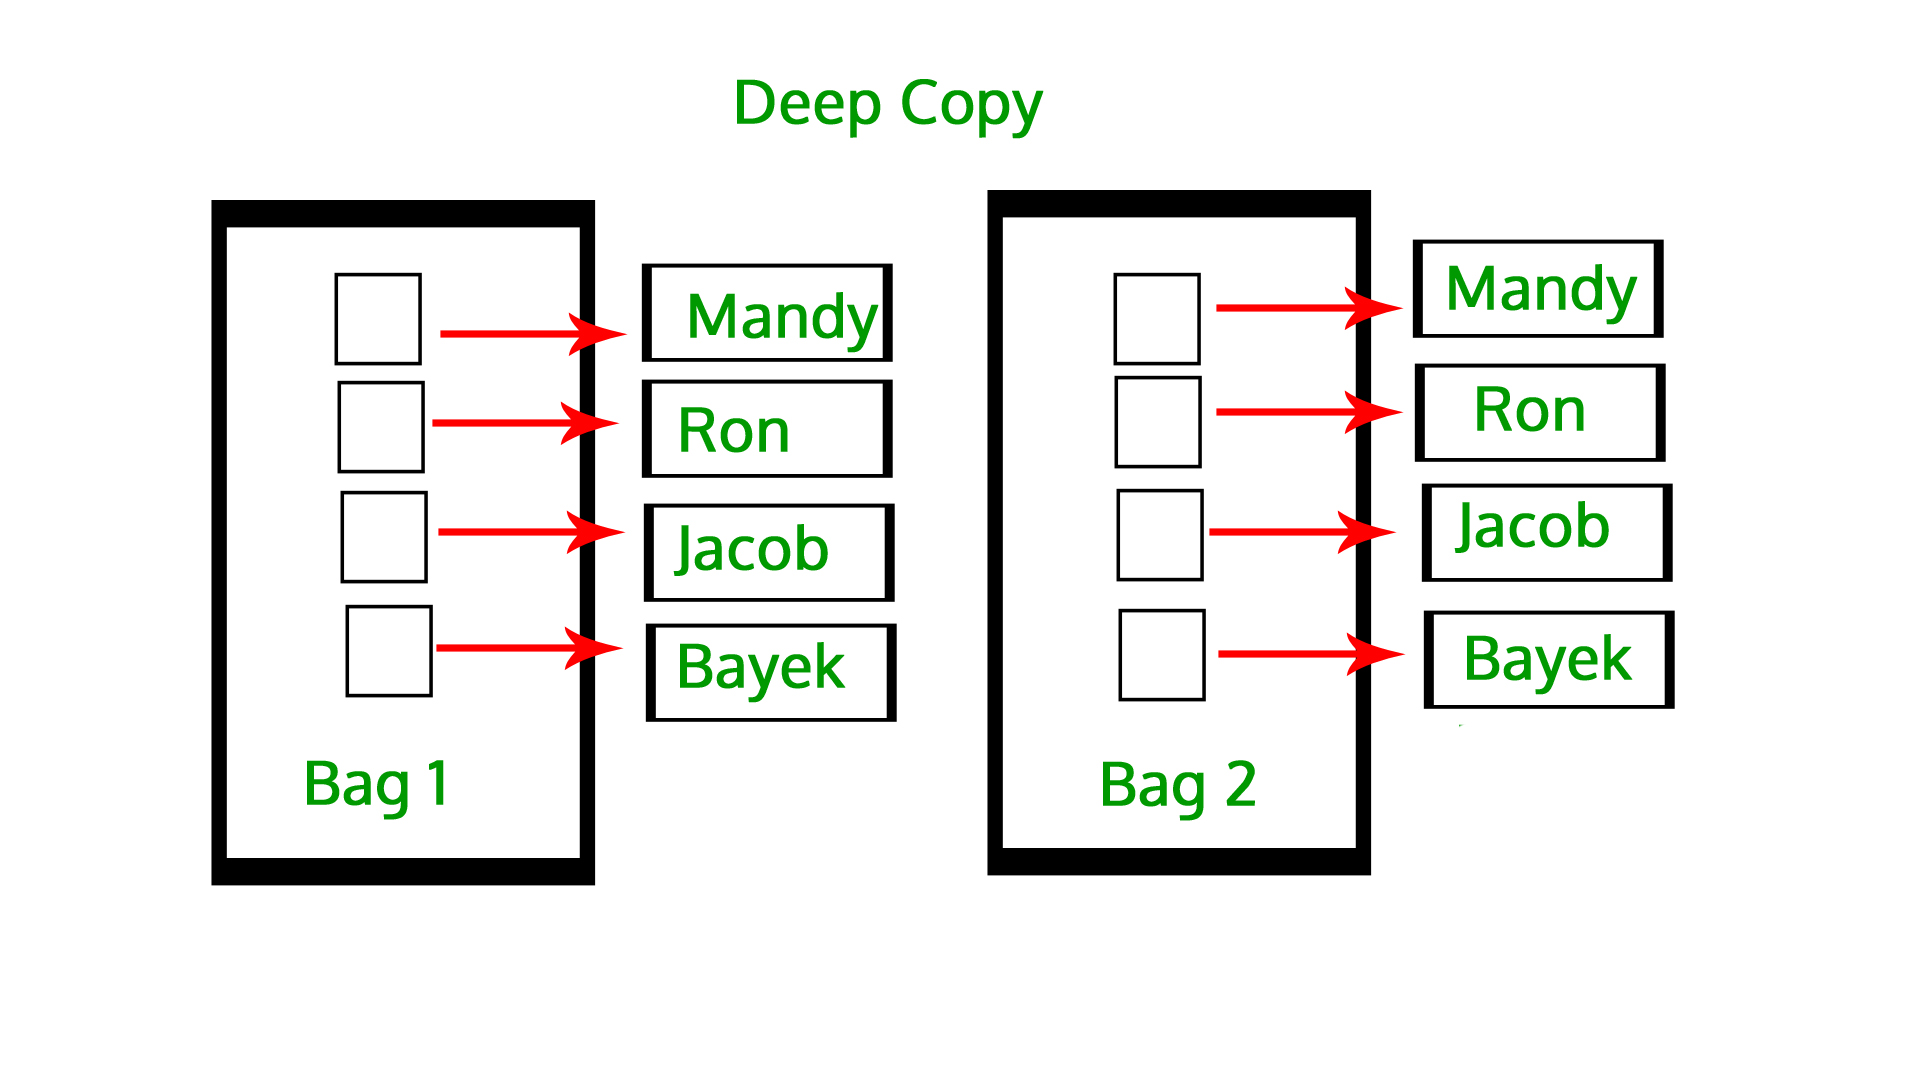

## Class and Instance Attributes

Instance attributes are owned by the specific instances of a class.<br>
This means for two different instances the instance attributes are usually different.

In [21]:
class Car:
    def __init__(self, model):
        self.model = model
obj1 = Car('bmw')
obj2 = Car('audi')
print(obj1.model)
print(obj2.model)

bmw
audi


Class attributes are attributes which are owned by the class itself.<br>
They will be shared by all the instances of the class.<br>
Therefore they have the same value for every instance.

Example:
    the class attribute "var" is the same for all instances, in our example "obj1" and "obj2".<br>
    Besides this, we see that we can access a class attribute via an instance or via the class name: 

In [22]:
class MyClass:
    var = 'class attribute'
obj1 = MyClass()
obj2 = MyClass()

to access class attribute referenced by the object

In [23]:
obj1.var

'class attribute'

In [24]:
obj2.var

'class attribute'

to access class attribute referenced by the class

In [25]:
obj1.__class__.var

'class attribute'

In [26]:
MyClass.var

'class attribute'

Changing class attributes:

If you want to change a class attribute, you have to do it with the notation ClassName.AttributeName.

In [27]:
MyClass.var = 'changed class attribute throughout'

In [28]:
obj1.var

'changed class attribute throughout'

In [29]:
obj2.var

'changed class attribute throughout'

In [30]:
MyClass.var

'changed class attribute throughout'

Otherwise, you will create a new instance variable.

In [31]:
obj1.var = 'creates a new instance attribute for obj1'

In [32]:
obj1.var

'creates a new instance attribute for obj1'

In [33]:
obj2.var

'changed class attribute throughout'

In [34]:
MyClass.var

'changed class attribute throughout'

If you want to change the class attribute without creating a new instance variable

In [35]:
obj1.__class__.var = 'changed class attribute throughout using object'

In [36]:
obj1.__class__.var

'changed class attribute throughout using object'

In [37]:
obj2.var

'changed class attribute throughout using object'

In [38]:
MyClass.var

'changed class attribute throughout using object'

In [39]:
obj1.var

'creates a new instance attribute for obj1'

#### Counting instances with class attributes 

In [40]:
class Count: 

    counter = 0
    
    def __init__(self): 
        self.counter += 1


x = Count()
print("counter x : " ,x.counter)
y = Count()
print("counter y : " ,y.counter)
print("counter Count : " ,Count.counter)

counter x :  1
counter y :  1
counter Count :  0


In [41]:
class Count: 

    counter = 0
    
    def __init__(self): 
        self.__class__.counter += 1


x = Count()
print("counter x : " ,x.counter)
y = Count()
print("counter y : " ,y.counter)
print("counter Count : " ,Count.counter)

counter x :  1
counter y :  2
counter Count :  2


## Instance Method vs Class Method vs Static Method
"plain" method vs @classmethod vs @staticmethod

### Instance Method
    - argument : self
    - self points to object instance
    - can modify and read attributes on the object instance
    - can modify class state

### Class Method
    - argument : cls 
    - can access the class itself or object representing a class
    - cannot modify and read attributes on the object instance
    - can modify class state
    - uses the @classmethod to denote Class Method

### Static method
    - no argument
    - no access to class or object instance
    - cannot modify and read attributes on the object instance
    - cannot modify class state
    - uses @staticmethod to denote Static Method

In [42]:
class MyClass:
    def method(self):
        return 'instance method called', self

    @classmethod
    def classmethod(cls):
        return 'class method called', cls

    @staticmethod
    def staticmethod():
        return 'static method called'

### Create Object Instance of MyClass

In [43]:
obj = MyClass()

### Calling all the methods with the object instance

#### Instance Method

In [44]:
obj.method()

('instance method called', <__main__.MyClass at 0x28a1de9ed30>)

The self parameter is a reference to the current instance of the class, and is used to access variables that belongs to the class.<br>
Therefore, <__main__.MyClass at 0x29aa87a8f28 is an instance of MyClass object

#### Class Method

In [45]:
obj.classmethod()

('class method called', __main__.MyClass)

class method has access to the class and not to any of the objects
 __main__.MyClass points to the class MyClass itself

#### Static Method

In [46]:
obj.staticmethod()

'static method called'

### Calling all the methods without creating the object instance

#### Class Method

In [47]:
MyClass.classmethod()

('class method called', __main__.MyClass)

#### Static Method

In [48]:
MyClass.staticmethod()

'static method called'

#### Instance Method

In [49]:
MyClass.method()

TypeError: method() missing 1 required positional argument: 'self'

Failed.<br>
Why?<br>
because we didnt create an instance of the class<br>

For example:<br>
class Car:<br>
>def print_car_details(self):<br>
>>...<br>
        
maruti = Car()<br>
maruti.print_car_details()<br>

Needs to access attributes specific to that instance

### Example:

#### Create a Car class

In [50]:
class Car:
    def __init__(self, model, mileage,  price):
        # constructor
        self.model = model
        self.mileage = mileage
        self.price = price

    def __repr__(self):
        # formatting into a string
        return f"Car({self.model!r},{self.mileage!r} ,{self.price!r})"        

#### Creating Car objects

In [51]:
Car('audi', '10kmph', 1000000)


Car('audi','10kmph' ,1000000)

In [52]:
Car('bmw', '15kmph', 1500000)

Car('bmw','15kmph' ,1500000)

#### Creating Cars with @classmethod

In [53]:
class Car:
    def __init__(self, model, mileage,  price):
        # constructor
        self.model = model
        self.mileage = mileage
        self.price = price

    def __repr__(self):
        # formatting into a string
        return f'Car{self.model,self.mileage,self.price!r}' 

    @classmethod
    def make_audi(cls):
        return cls('audi', '10kmph', 10000)

    @classmethod
    def make_bmw(cls):
        return cls('bmw', '15kmph', 20000)

In [54]:
Car.make_audi()

Car('audi', '10kmph', 10000)

In [55]:
Car.make_bmw()

Car('bmw', '15kmph', 20000)

- used in definition of factory methods
- call make_audi without creating Car instance
- used if there is a constructor with a lot of arguments
- allow you to define alternative constructors for your classes 
- They are often used, where we have static methods, which have to call other static methods. To do this, we would have to hard code the class name, if we had to use static methods. This is a problem, if we are in a use case, where we have inherited classes.

#### Using Static Methods

In [56]:
class Car:
    def __init__(self, tax_rate, model, mileage,  price):
        self.model = model
        self.tax_rate = tax_rate
        self.mileage = mileage
        self.price = price

    def __repr__(self):
        return f'Car{self.model,self.tax_rate,self.mileage,self.price!r}'

    def calculate_tax(self):
        return self.calculate_tax_static(self.tax_rate)

    @staticmethod
    def calculate_tax_static(tax_rate):
        return tax_rate*100

- self contained method
- does not have access to class information or object instance
- will not modify state of the object
- Because the calculate_tax_static() method is completely independent from the rest of the class it’s much easier to test.

In [57]:
car = Car(43, 'audi',  '10kmph', 10000)

In [58]:
car.calculate_tax()

4300

In [59]:
Car.calculate_tax_static(43)

4300

Final Thoughts
- Instance methods need a class instance and can access the instance through self.
  Able to access data and properties unique to each instance.
- Class methods don’t need a class instance. They can’t access the instance (self) but they have access to the class itself via cls.
- Static methods don’t have access to cls or self. They work like regular functions but belong to the class’s namespace.
- Static and class methods communicate and (to a certain degree) enforce developer intent about class design. This can have maintenance benefits.
